In [3]:

import tensorflow as tf 
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Common_Functions as cf


In [4]:
df_pions = np.array(pd.read_csv('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Djuna_Data_Generation_Notebook/noshift1.csv',header = None))

def data_normaliser(data):
    mean = np.mean(data, axis = 0)
    std = np.std(data,axis = 0)
    return (data -mean)/std 

In [5]:
train_x, train_y = cf.data_normaliser(df_pions[:-1000,:8]), df_pions[:-1000,-1]
val_x, val_y = cf.data_normaliser(df_pions[-1000:,:8]), df_pions[-1000:,-1]

In [6]:
opt = keras.optimizers.Adam(learning_rate= 0.005, beta_1 = 0.7, beta_2= 0.99)
#inital_test = trained_network(train_x,train_y,val_x,val_y,[16,16], optimizer= opt, verbose= 0).history


In [7]:
#plt.plot(range(1,101),inital_test['mean_absolute_percentage_error'])
#print(np.min(inital_test['mean_absolute_percentage_error']))

Initial Work - What metric am i going to define a minimum by
- Ideally I dont want to look at each graph- Thus I think some kind of exponential smoothing should be added, 
this weights each point with history 
-Possible Idea --- Find a minimum, If the mean of the points after is greater than the standard deviation of 20 nearest neighbours, then this is a U shape tp - find some way of assesing the error there
                --- if you find a minimum and point plus std is less than future points then you can take the mean of future points and calculate the eror, 
                --- if the minima is the final point take that and maybe label 

Testing convergance with sample size. 
Going to take in the range of 10 hours 
Im going to absolutely cook my computer 


In [8]:

def parallel_test(num_points, train_x,train_y, width):
    number_of_training_points = np.geomspace(10,len(train_x),num = num_points,dtype= int)
    #print(number_of_training_points)
    min_mae = np.zeros((num_points,width))
    is_last_epoc = np.zeros_like(min_mae)
    for i in range(num_points): 
        print('Loop Number #',i)
        for j in range(width):
            history  =  cf.trained_network(train_x[:number_of_training_points[i]],train_y[:number_of_training_points[i]],val_x,val_y,[16,16], optimizer= opt, verbose= 0).history
            mae = np.array(history['mean_absolute_percentage_error'])
            min_mae[i,j] = np.min(mae)

            if np.argmin(mae) == len(mae)-1: is_last_epoc[i,j] = 1
    return min_mae,is_last_epoc,number_of_training_points
        

In [9]:
points = 50
test_width = 10
min_mae, min_val_bool, training_points = parallel_test(points,train_x,train_y, test_width)

Loop Number # 0


2021-11-04 09:03:43.365598: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-11-04 09:03:43.366128: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-11-04 09:03:43.388292: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-04 09:03:43.388631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:2b:00.0 name: NVIDIA GeForce GTX 970 computeCapability: 5.2
coreClock: 1.253GHz coreCount: 13 deviceMemorySize: 3.93GiB deviceMemoryBandwidth: 208.91GiB/s
2021-11-04 09:03:43.388651: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2021-11-04 09:03:43.389674: I tensorflow/stream_executor/platform/def

Loop Number # 1


KeyboardInterrupt: 

([<matplotlib.axis.XTick at 0x7f4f7d0aa410>,
 [Text(2.302585092994046, 0, '10'),
  Text(3.9889840465642745, 0, '54'),
  Text(5.869296913133774, 0, '354'),
  Text(7.7475968386928855, 0, '2316'),
  Text(9.625227618663251, 0, '15142'),
  Text(11.502875129116727, 0, '99000')])

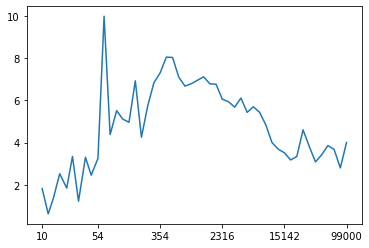

In [ ]:
plt.plot(np.log(number_of_training_points),min_mae)
plt.xticks(np.log(number_of_training_points)[[0,9,19,29,39,49]],labels= number_of_training_points[[0,9,19,29,39,49]])